Importing Data


In [126]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing required libraries

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

Reading the suv dataset from google drive

In [128]:
data=pd.read_csv('/content/drive/My Drive/CSV/suv_data.csv')
print(data.shape)
data.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


checking the number of tuples

In [129]:
print("Number of people buying suv "+str(len(data.index)))

Number of people buying suv 400


# Data Analysis

Plotting graphs

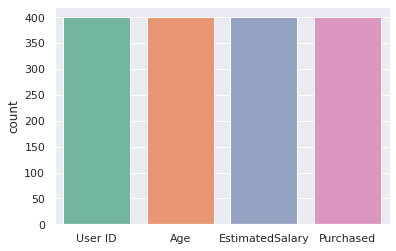

In [130]:
sns.set_palette("dark") # for the color intensity
sns.set_theme(style="darkgrid") # to change the theme 
sns.countplot(data=data,palette="Set2")

plt.rcParams['figure.figsize']=(11.0,5.0)



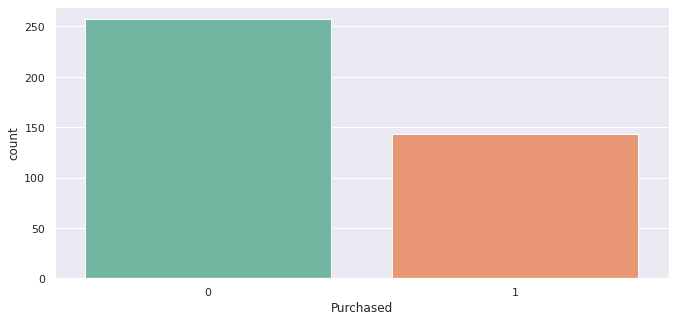

In [131]:
sns.set_palette("dark") # for the color intensity
sns.set_theme(style="darkgrid") # to change the theme 
sns.countplot(x='Purchased',data=data,palette='Set2')
plt.rcParams['figure.figsize']=(11.0,5.0)

plotting graph for the gender wise purchase of suv

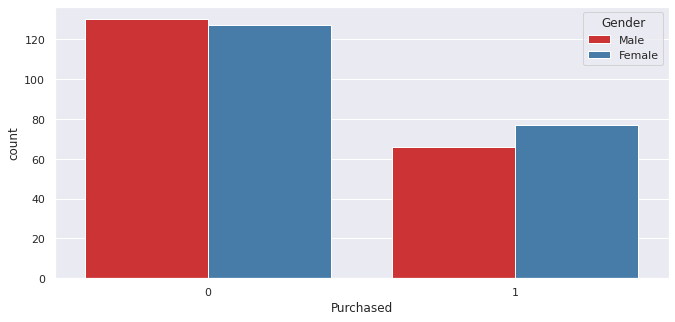

In [132]:
sns.set_palette("dark") # for the color intensity
sns.set_theme(style="darkgrid") # to change the theme 
sns.countplot(x='Purchased',hue='Gender',data=data,palette='Set1')
plt.rcParams['figure.figsize']=(11.0,5.0)

Histogram for Age 

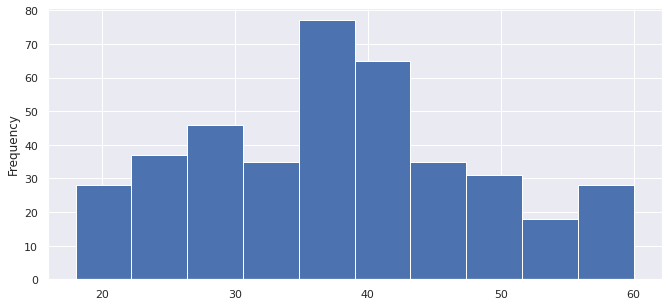

In [133]:

plt.rcParams['figure.figsize']=(11.0,5.0)
data['Age'].plot.hist()

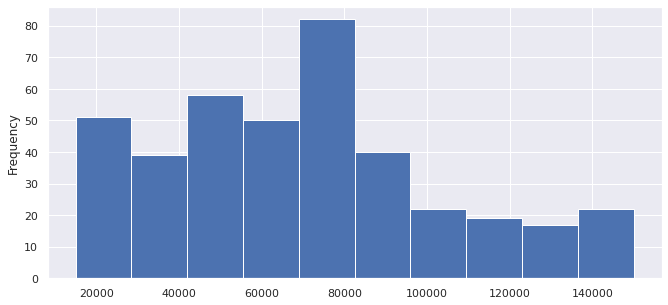

In [134]:
data['EstimatedSalary'].plot.hist()

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Data Wrangling

Idetifying Missing values

In [136]:
data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [137]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Already the data does not contain any null value 

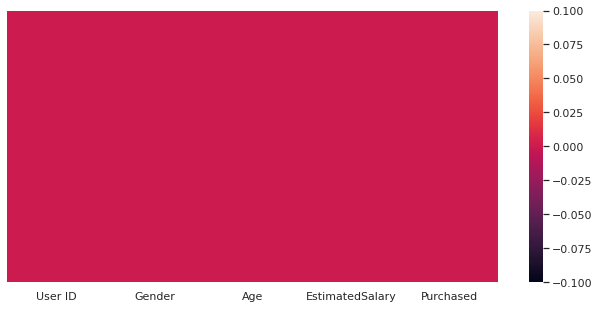

In [138]:
plt.rcParams['figure.figsize'] = (11.0, 5.0)
sns.heatmap(data.isnull(),yticklabels=False)

# Box Plot

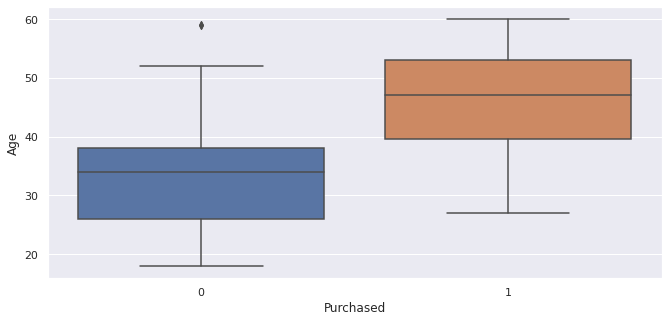

In [148]:
sns.boxplot(x='Purchased', y='Age', data=data)

# Changing String to categorical value

In [140]:
Purchased=pd.get_dummies(data['Purchased'],drop_first=True)
Purchased.head(9)

,1
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0


In [141]:
gender = pd.get_dummies(data['Gender'],drop_first=True)
gender.head(9)


,Male
0,1
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,1


Combining all new vectors in data

In [142]:
data=pd.concat([data,gender,Purchased],axis=1)
data.head(9)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male,1
0,15624510,Male,19,19000,0,1,0
1,15810944,Male,35,20000,0,1,0
2,15668575,Female,26,43000,0,0,0
3,15603246,Female,27,57000,0,0,0
4,15804002,Male,19,76000,0,1,0
5,15728773,Male,27,58000,0,1,0
6,15598044,Female,27,84000,0,0,0
7,15694829,Female,32,150000,1,0,1
8,15600575,Male,25,33000,0,1,0


# Removing irrelevant data

In [143]:
data.drop(['User ID','Gender','EstimatedSalary'],axis=1,inplace=True)


In [144]:
data.head(9)

,Age,Purchased,Male,1
0,19,0,1,0
1,35,0,1,0
2,26,0,0,0
3,27,0,0,0
4,19,0,1,0
5,27,0,1,0
6,27,0,0,0
7,32,1,0,1
8,25,0,1,0


Above is formated data 

# Test & Train

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 
x = data.drop('Purchased', axis=1)
y = data['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print('Classification Report')

print(classification_report(y_test, predictions))

print('Confusion Matrix')

print(confusion_matrix(y_test, predictions))

print('\n Accuracy Report')

print(accuracy_score(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        51

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

Confusion Matrix
[[81  0]
 [ 0 51]]

 Accuracy Report
1.0
